# Movie Reviews on IMDB Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Pooja Sambhwani\\Python Programming (Regex)\\Datasets\\imdb.csv")

In [3]:
df.head()

,rating-other-user-rating,title,text
0,8,an extremely well-crafted and ambitious horror...,"Disturbing, eerie, and tense, the first half o..."
1,6,What's the plot?,Although I liked the cinematography and though...
2,7,Very Well Done,"Shamanistic rituals, curses, folklore, history..."
3,6,Another Chilling Folk Horror Phenomenon From K...,Exhuma (2024 :\nMovie Review:Korean cinema is ...
4,7,Exhuma,"""Kim"" (Choi Min-sik) is what they call a geoma..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rating-other-user-rating  47 non-null     int64 
 1   title                     47 non-null     object
 2   text                      47 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


# Exploratory Data Analysis: Plotting the distribution of ratings

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

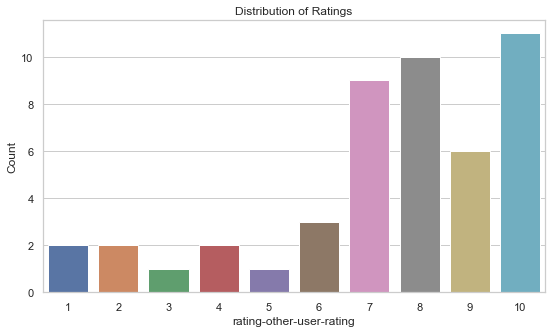

In [7]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'rating-other-user-rating')
plt.title('Distribution of Ratings')
plt.xlabel('rating-other-user-rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data

We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text. We can use this score to classify each review's sentiment as positive, negative or neutral.

In [8]:
# Step1: first clean the data, clean the column of reviews 
# import textblob library: used for analyzing sentiments
# 0.1 positive reviews
# -0.1 negative reviews
# 0 neutral reviews
# feature engineering is used for creating new column : sentiment analysis

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [12]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
df['Sentiment'] = df['title'].apply(textblob_sentiment_analysis)

In [15]:
df.sample(10)

,rating-other-user-rating,title,text,Sentiment
6,8,Korean Horror Delves into the history of the J...,"""Exhuma"" emerges as a bold tapestry of horror,...",Neutral
41,9,Unexpected Plot combined with Korean Exorcism ...,"In my opinion, Exhuma is one of the horror mas...",Positive
0,8,an extremely well-crafted and ambitious horror...,"Disturbing, eerie, and tense, the first half o...",Positive
2,7,Very Well Done,"Shamanistic rituals, curses, folklore, history...",Positive
42,8,Almost perfect horror film,Giving this an 8/10 ratingI'll be paying more ...,Positive
32,9,Must Watch,I'm going to start by saying that I am not a h...,Neutral
22,8,Exhuma is A good Horror Thriller,Exhuma is a dark and engaging modern horror fi...,Positive
27,8,Korean horror at its finest,"I loved this movie. It's got depth to it, char...",Neutral
31,9,The plotline is so riveting!!,This show is a true gem! With its unique blend...,Positive
5,9,One of the most perfect and balanced horror mo...,"""Exhuma"" is a horror gem that demands your att...",Positive


# Analyzing Movie Reviews Sentiments

In [16]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Positive    21
Neutral     18
Negative     8
Name: Sentiment, dtype: int64

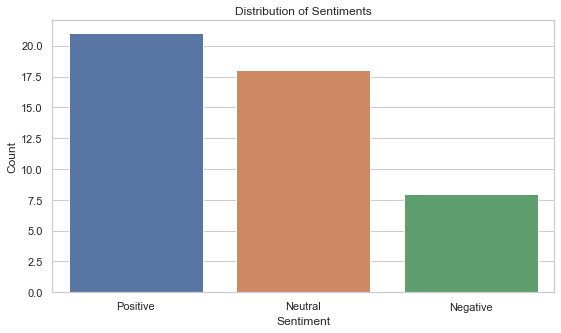

In [17]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index, y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

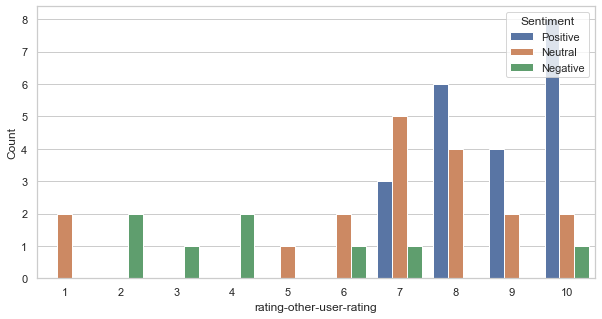

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'rating-other-user-rating', hue = 'Sentiment')
plt.xlabel('rating-other-user-rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

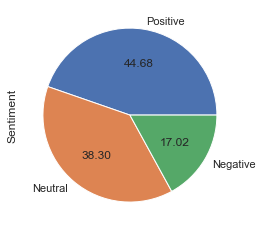

In [19]:
df['Sentiment'].value_counts().plot(kind = 'pie' , autopct = '%.2f') 